# DATA 231 Final Project
## By Neil Pandya and Alejandro Orellana

In [50]:
import os
import pandas as pd
import numpy as np

def pull_img(row):
    img_name = f"{row['R.A.']}_{row['Dec.']}"
    for end in ['test', 'train', 'valid']:
        file_path = f'../../galaxy_data/galaxy_classification_dataset/dataset/GC_DR1_HSC/{end}/{img_name}.png'
        if os.path.exists(file_path):
            row['Image'] = file_path
            return row
    return row

data_1 = pd.read_csv('../../galaxy_data/galaxy_classification_dataset/dataset/GC1_test.csv')
data_2 = pd.read_csv('../../galaxy_data/galaxy_classification_dataset/dataset/GC1_train.csv')
data_3 = pd.read_csv('../../galaxy_data/galaxy_classification_dataset/dataset/GC1_valid.csv')

galaxy_data = pd.concat([data_1, data_2, data_3])
galaxy_data['Image'] = np.nan
galaxy_data = galaxy_data.apply(lambda row: pull_img(row), axis=1)

galaxy_data

,object_id,R.A.,Dec.,specz,zcmodel_mag,tract,patch,layer,num_class,galaxy_type,interaction,ring,fan,tailm,distortion,label1,Image
0,70391284166066381,235.840526,43.230191,0.099190,16.2524,16005,400,wide,75,0.97834,0.95023,0.123457,0.086420,0.604938,0.185185,3,../../galaxy_data/galaxy_classification_datase...
1,40972355916290781,133.913723,-0.778257,0.105967,16.8474,9316,104,wide,89,0.06284,0.92784,0.034483,0.574713,0.080460,0.310345,1,../../galaxy_data/galaxy_classification_datase...
2,42261387270972687,207.322420,0.357393,0.147905,16.8340,9609,402,wide,74,0.63136,0.85110,0.792453,0.132075,0.000000,0.075472,0,../../galaxy_data/galaxy_classification_datase...
3,41228125513734239,218.921836,-1.019656,0.089828,16.8352,9374,603,wide,62,0.45548,0.81288,0.660000,0.140000,0.040000,0.160000,0,../../galaxy_data/galaxy_classification_datase...
4,70399818266081502,240.626430,43.743165,0.131738,16.8326,16007,203,wide,96,0.07534,0.88717,0.955224,0.029851,0.000000,0.014925,0,../../galaxy_data/galaxy_classification_datase...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,69630447889437809,246.704404,42.678918,0.030449,15.0314,15832,406,wide,85,0.18456,0.80081,0.833333,0.075758,0.045455,0.045455,0,../../galaxy_data/galaxy_classification_datase...
204,41214944259118100,214.464129,-0.310185,0.123080,16.5301,9371,606,wide,62,0.95953,0.81108,0.207547,0.113208,0.358491,0.320755,3,../../galaxy_data/galaxy_classification_datase...
205,42679352013383952,347.957465,0.928739,0.132926,16.9696,9704,505,wide,65,1.00000,1.00000,0.000000,0.000000,0.742424,0.257576,3,../../galaxy_data/galaxy_classification_datase...
206,41209846132932133,213.918680,-0.862630,0.139193,16.3222,9370,103,wide,47,0.20147,0.82237,0.064516,0.193548,0.258065,0.483871,2,../../galaxy_data/galaxy_classification_datase...


In [51]:
import random

spiral_img = random.choice(galaxy_data[galaxy_data['galaxy_type'] == 1.0]['Image'].reset_index(drop=True))
not_spiral_img = random.choice(galaxy_data[galaxy_data['galaxy_type'] == 0.0]['Image'].reset_index(drop=True))
ring_img = random.choice(galaxy_data[galaxy_data['ring'] > 0.95]['Image'].reset_index(drop=True))
fan_img = random.choice(galaxy_data[galaxy_data['fan'] > 0.7]['Image'].reset_index(drop=True))
tail_img = random.choice(galaxy_data[galaxy_data['tailm'] > 0.9]['Image'].reset_index(drop=True))
dist_img = random.choice(galaxy_data[galaxy_data['distortion'] > 0.8]['Image'].reset_index(drop=True))

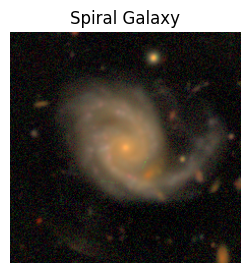

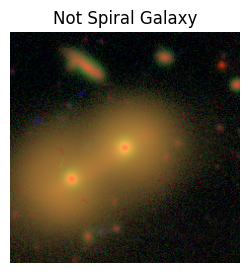

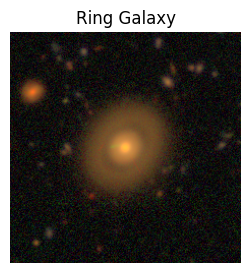

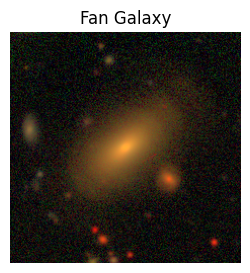

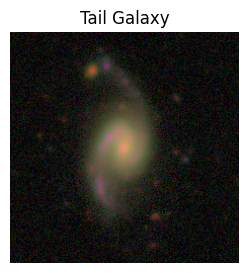

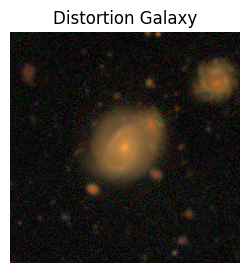

In [52]:
from PIL import Image
import matplotlib.pyplot as plt

def print_img(path, label):
    plt.figure(figsize=(3,3))
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{label} Galaxy')
    plt.show()

labels = ['Spiral', 'Not Spiral', 'Ring', 'Fan', 'Tail', 'Distortion']
vars = [spiral_img, not_spiral_img, ring_img, fan_img, tail_img, dist_img]

for i in range(6):
    print_img(vars[i], labels[i])

In [53]:
galaxy_data['Is_Spiral'] = galaxy_data['galaxy_type'].apply(lambda p: 1 if p > 0.65 else 0)
galaxy_data['Is_Spiral'].value_counts()

Is_Spiral
1    724
0    578
Name: count, dtype: int64

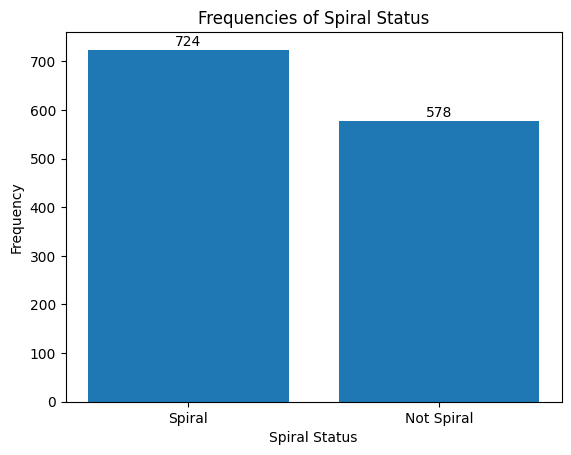

In [60]:
plt.bar(['Spiral', 'Not Spiral'], galaxy_data['Is_Spiral'].value_counts())
plt.title('Frequencies of Spiral Status')
plt.xlabel('Spiral Status')
plt.ylabel('Frequency')
for i, count in enumerate(galaxy_data['Is_Spiral'].value_counts()):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')
plt.show()

Epoch 1/20 | Train Loss: 0.6889, Val Loss: 0.6880, Accuracy: 0.5538
Epoch 2/20 | Train Loss: 0.6715, Val Loss: 0.6173, Accuracy: 0.6513
Epoch 3/20 | Train Loss: 0.6191, Val Loss: 0.6086, Accuracy: 0.7231
Epoch 4/20 | Train Loss: 0.5398, Val Loss: 0.5570, Accuracy: 0.6974
Epoch 5/20 | Train Loss: 0.5569, Val Loss: 0.4677, Accuracy: 0.7538
Epoch 6/20 | Train Loss: 0.4972, Val Loss: 0.4632, Accuracy: 0.7692
Epoch 7/20 | Train Loss: 0.4545, Val Loss: 0.4679, Accuracy: 0.7436
Epoch 8/20 | Train Loss: 0.4819, Val Loss: 0.5190, Accuracy: 0.7436
Epoch 9/20 | Train Loss: 0.4997, Val Loss: 0.4700, Accuracy: 0.7641
Epoch 10/20 | Train Loss: 0.4438, Val Loss: 0.4904, Accuracy: 0.7385
Epoch 11/20 | Train Loss: 0.4809, Val Loss: 0.4257, Accuracy: 0.7795
Epoch 12/20 | Train Loss: 0.4344, Val Loss: 0.4291, Accuracy: 0.7846
Epoch 13/20 | Train Loss: 0.4364, Val Loss: 0.4557, Accuracy: 0.7590
Epoch 14/20 | Train Loss: 0.4493, Val Loss: 0.4670, Accuracy: 0.7538
Epoch 15/20 | Train Loss: 0.4120, Val Loss:

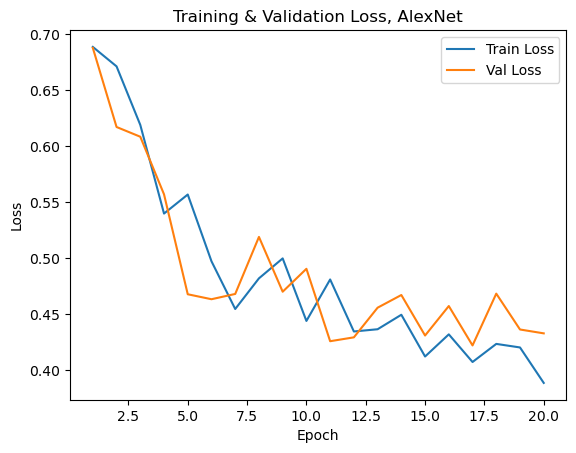

In [31]:
# AlexNet Architecture

from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

class GalaxyDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image_path = self.dataframe.loc[idx, 'Image']
        label = self.dataframe.loc[idx, 'Is_Spiral']
        image = Image.open(image_path).convert("RGB")
        
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

class GalaxySpiralAlexNet(nn.Module):
    def __init__(self):
        super(GalaxySpiralAlexNet, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2), 
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), 
            nn.Conv2d(64, 192, kernel_size=5, padding=2), 
            nn.ReLU(),
            nn.Conv2d(192, 384, kernel_size=3, padding=1), 
            nn.ReLU(),
            nn.Conv2d(384, 256, kernel_size=3, padding=1), 
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), 
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        with torch.no_grad():
            dummy_input = torch.zeros(1, 3, 227, 227)
            dummy_output = self.cnn(dummy_input)
            self.flattened_size = dummy_output.view(1, -1).shape[1]

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flattened_size, 4096), 
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096), 
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 1)
        )

    def forward(self, x):
        x = self.cnn(x)
        x = self.fc(x)
        return x
    
train_transforms = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_df, temp_df = train_test_split(galaxy_data, test_size=0.3, random_state=13, stratify=galaxy_data['Is_Spiral'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=13, stratify=temp_df['Is_Spiral'])

train_dataset = GalaxyDataset(train_df, transform=train_transforms)
val_dataset = GalaxyDataset(val_df, transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_AN = GalaxySpiralAlexNet().to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model_AN.parameters(), lr=1e-4)

num_epochs = 20
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model_AN.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model_AN(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model_AN.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.unsqueeze(1).to(device)

            outputs = model_AN(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels.bool()).sum().item()
            total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    accuracy = correct / total

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4f}")

plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss, AlexNet')
plt.legend()
plt.show()

Epoch 1/20 | Train Loss: 0.6233, Val Loss: 0.6575, Accuracy: 0.6205
Epoch 2/20 | Train Loss: 0.5252, Val Loss: 0.5359, Accuracy: 0.7538
Epoch 3/20 | Train Loss: 0.5156, Val Loss: 0.5265, Accuracy: 0.7692
Epoch 4/20 | Train Loss: 0.5035, Val Loss: 0.5226, Accuracy: 0.7744
Epoch 5/20 | Train Loss: 0.4883, Val Loss: 0.4614, Accuracy: 0.7795
Epoch 6/20 | Train Loss: 0.4894, Val Loss: 0.4900, Accuracy: 0.7692
Epoch 7/20 | Train Loss: 0.4542, Val Loss: 0.4544, Accuracy: 0.7590
Epoch 8/20 | Train Loss: 0.4759, Val Loss: 0.4255, Accuracy: 0.8410
Epoch 9/20 | Train Loss: 0.4291, Val Loss: 0.5128, Accuracy: 0.7538
Epoch 10/20 | Train Loss: 0.4431, Val Loss: 0.5763, Accuracy: 0.6872
Epoch 11/20 | Train Loss: 0.4501, Val Loss: 0.4673, Accuracy: 0.7641
Epoch 12/20 | Train Loss: 0.4267, Val Loss: 0.3965, Accuracy: 0.8256
Epoch 13/20 | Train Loss: 0.4267, Val Loss: 0.3979, Accuracy: 0.8154
Epoch 14/20 | Train Loss: 0.4139, Val Loss: 0.3751, Accuracy: 0.8308
Epoch 15/20 | Train Loss: 0.4205, Val Loss:

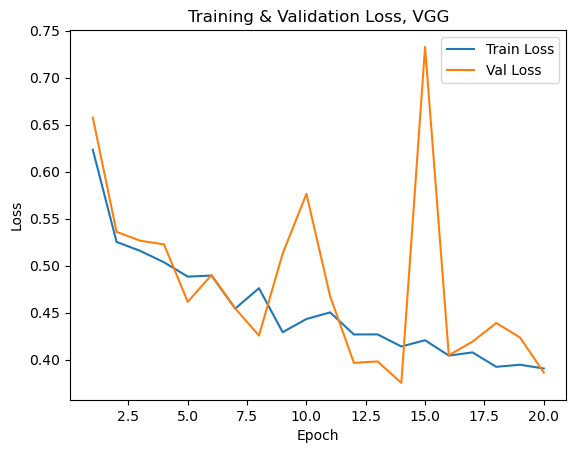

In [32]:
# VGG Architecture

class GalaxySpiralVGG(nn.Module):
    def __init__(self):
        super(GalaxySpiralVGG, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.AdaptiveAvgPool2d((4, 4))
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        x = self.cnn(x)
        x = self.fc(x)
        return x
    

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_vgg = GalaxySpiralVGG().to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model_vgg.parameters(), lr=1e-4)

num_epochs = 20
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model_vgg.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model_vgg(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model_vgg.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.unsqueeze(1).to(device)

            outputs = model_vgg(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels.bool()).sum().item()
            total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    accuracy = correct / total

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4f}")

plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss, VGG')
plt.legend()
plt.show()

AlexNet Architecture Performance: 
Test Accuracy, AlexNet Architecture: 0.8265
Test F1 Score, AlexNet Architecture: 0.8468


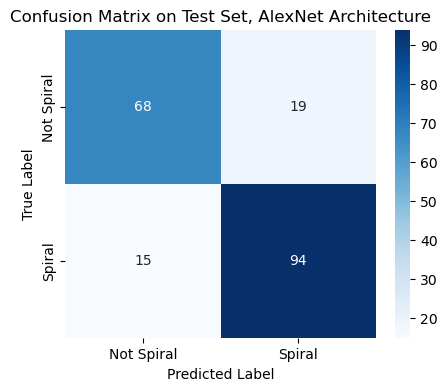


VGG Architecture Performance: 
Test Accuracy, VGG Architecture: 0.8112
Test F1 Score, VGG Architecture: 0.8295


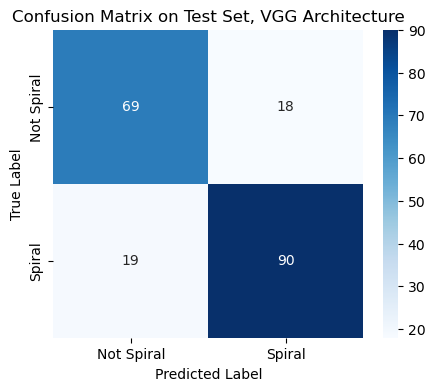

In [34]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

test_dataset = GalaxyDataset(test_df, transform=val_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

def evaluate_model(model, name):
    global device, test_loader
    
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device).unsqueeze(1).float()
            
            outputs = model(images)
            predictions = torch.sigmoid(outputs) > 0.5
            
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
            
            all_preds.extend(predictions.cpu().numpy().astype(int))
            all_labels.extend(labels.cpu().numpy().astype(int))
    
    accuracy = correct / total
    f1 = f1_score(all_labels, all_preds)
    print(f'Test Accuracy, {name} Architecture: {accuracy:.4f}')
    print(f'Test F1 Score, {name} Architecture: {f1:.4f}')

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spiral', 'Spiral'], yticklabels=['Not Spiral', 'Spiral'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix on Test Set, {name} Architecture')
    plt.show()

print("AlexNet Architecture Performance: ")
evaluate_model(model_AN, "AlexNet")

print("\nVGG Architecture Performance: ")
evaluate_model(model_vgg, "VGG")

# CNN feature extraction for k-means clustering, visualized with PCA and tSNE

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\aorel/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [00:48<00:00, 11.4MB/s] 


Spiral/Not Spiral (2-cluster) KMeans Clustering Alignment:
Adjusted Rand Index (ARI): -0.0023
Normalized Mutual Information (NMI): 0.0044

Galaxy Class (4-cluster) KMeans Clustering Alignment:
Adjusted Rand Index (ARI): 0.0618
Normalized Mutual Information (NMI): 0.0877



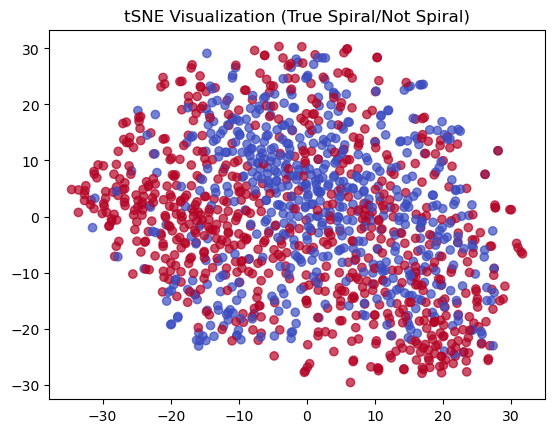

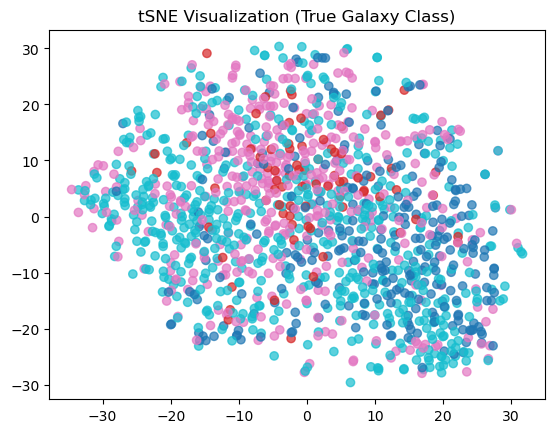

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import warnings
warnings.filterwarnings("ignore")

class GalaxyDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image = Image.open(row['Image']).convert('RGB')
        label = row['label1']
        is_spiral = row['Is_Spiral']
        
        if self.transform:
            image = self.transform(image)
        
        return image, is_spiral, label

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

dataset = GalaxyDataset(galaxy_data, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.vgg16(pretrained=True).features.to(device)
model.eval()

features_list = []
spiral_labels = []
class_labels = []

with torch.no_grad():
    for images, is_spiral, label in dataloader:
        images = images.to(device)
        feats = model(images)
        feats = feats.view(feats.size(0), -1).cpu().numpy()

        features_list.append(feats)
        spiral_labels.extend(is_spiral.numpy())
        class_labels.extend(label.numpy())

features_all = np.vstack(features_list)

pca = PCA(n_components=50, random_state=13)
features_pca = pca.fit_transform(features_all)

def run_clustering_and_evaluate(k, true_labels, label_name):
    kmeans = KMeans(n_clusters=k, random_state=13)
    cluster_preds = kmeans.fit_predict(features_pca)

    ari = adjusted_rand_score(true_labels, cluster_preds)
    nmi = normalized_mutual_info_score(true_labels, cluster_preds)

    print(f"{label_name} ({k}-cluster) KMeans Clustering Alignment:")
    print(f"Adjusted Rand Index (ARI): {ari:.4f}")
    print(f"Normalized Mutual Information (NMI): {nmi:.4f}\n")

    return cluster_preds

kmeans_2 = run_clustering_and_evaluate(2, spiral_labels, "Spiral/Not Spiral")
kmeans_4 = run_clustering_and_evaluate(4, class_labels, "Galaxy Class")

tsne = TSNE(n_components=2, perplexity=30, random_state=13)
features_tsne = tsne.fit_transform(features_pca)

plt.figure()
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=spiral_labels, cmap='coolwarm', alpha=0.7)
plt.title("tSNE Visualization (True Spiral/Not Spiral)")

plt.figure()
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=class_labels, cmap='tab10', alpha=0.7)
plt.title("tSNE Visualization (True Galaxy Class)")

plt.show()